# 6.5 - Plotly

https://plotly.com/

https://stackoverflow.com/questions/52771328/plotly-chart-not-showing-in-jupyter-notebook

In [1]:
#!pip install chart-studio
#!pip install cufflinks

In [2]:
#!pip install "plotly>=5" "ipywidgets>=7.6"

In [3]:
#!pip install "ipywidgets>=7.5"

In [4]:
#!pip install jupyter-dash

In [5]:
import chart_studio.plotly as py
import cufflinks as cf

import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

cf.go_offline() # es para quen el grafico se printee en local, en el jupyter

import pandas as pd

import warnings
warnings.simplefilter('ignore')

In [6]:
df=pd.read_excel(r'C:\Users\HP\Dropbox\Mi PC (DESKTOP-KE4BQ28)\Desktop\Bootcamp\ds_tb_part_21_09\data\Online Retail.xlsx')
df.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Revenue,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
1,536373,2010-12-01 09:02:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
2,536375,2010-12-01 09:32:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.55,15.3,17850,United Kingdom
3,536390,2010-12-01 10:19:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,64,2.55,163.2,17511,United Kingdom
4,536394,2010-12-01 10:39:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,32,2.55,81.6,13408,United Kingdom


In [7]:
# cantidad e ingresos por pais, sin UK, abril 2011

data=df[df.Country!='United Kingdom']

data=data.loc[(data.InvoiceDate>='2011-4-1') & (data.InvoiceDate<='2011-4-30')]

data.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,Revenue,CustomerID,Country
724,549667,2011-04-11 12:20:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,6,2.95,17.70,14911,EIRE
807,551163,2011-04-26 15:52:00,85123A,CREAM HANGING HEART T-LIGHT HOLDER,9,2.95,26.55,12573,France
3320,550899,2011-04-21 12:07:00,22752,SET 7 BABUSHKA NESTING BOXES,2,8.50,17.00,13505,Switzerland
4880,550527,2011-04-19 10:48:00,84879,ASSORTED COLOUR BIRD ORNAMENT,40,1.69,67.60,12476,Germany
4882,550620,2011-04-19 13:39:00,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,54.08,12585,Germany


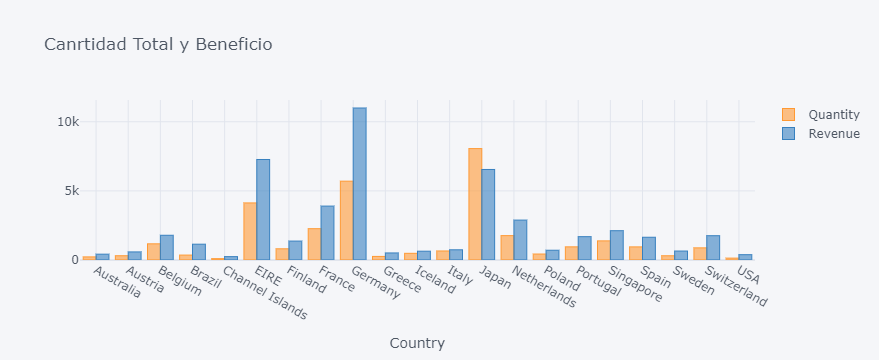

In [8]:
data=data.groupby('Country').sum()

data=data[['Quantity', 'Revenue']]

data.iplot(kind='bar',
           xTitle='Country',
           title='Canrtidad Total y Beneficio')

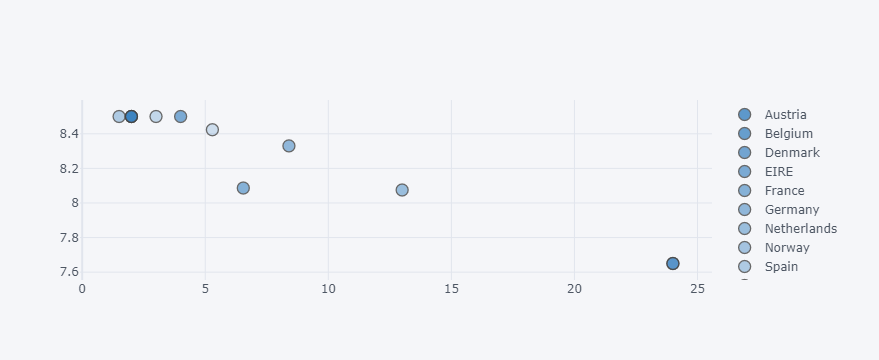

In [9]:
# cantidad media 

data=df.loc[df.Description=='SET 7 BABUSHKA NESTING BOXES']

data=data.groupby('Country').mean()

data=data[['Quantity', 'UnitPrice']]

data.reset_index(inplace=True)

data.iplot(x='Quantity', 
           y='UnitPrice', 
           categories='Country',
           color='blue')

In [10]:
# sunburst

import plotly.graph_objects as go

In [11]:
labels=['Label', 'F1', 'F2', 'F1.1', 'F1.1.1']

parents=['', 'Label', 'Label', 'F1', 'F1.1']

values=[1,3,4,5,6]


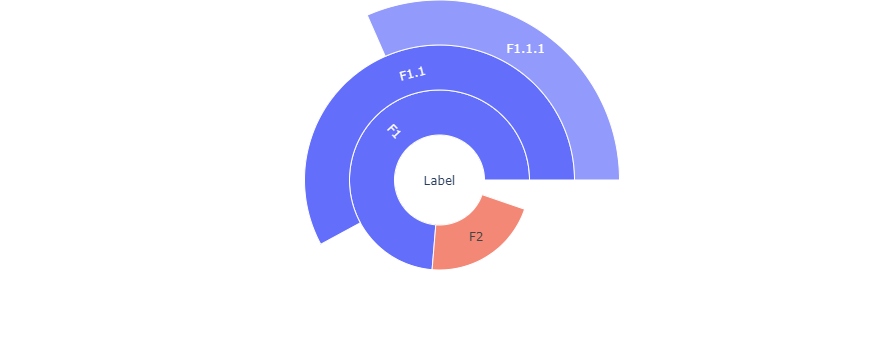

In [12]:
fig=go.Figure(go.Sunburst(labels=labels, parents=parents, values=values))
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0), width=300, height=300)

fig.write_html('images/sun.html')

fig.show()